<a href="https://colab.research.google.com/github/simonastojev/midi/blob/main/TestingClassicalMusicMIDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install music21 keras
!apt install -y timidity ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
timidity is already the newest version (2.14.0-8ubuntu1.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [3]:
!pip install tensorflow

In [4]:
import kagglehub
soumikrakshit_classical_music_midi_path = kagglehub.dataset_download('soumikrakshit/classical-music-midi')
print('Završen uvoz ulaza.')


Završen uvoz ulaza.


In [5]:
print("Dataset je smešten u:", soumikrakshit_classical_music_midi_path)

Dataset je smešten u: /kaggle/input/classical-music-midi


In [6]:
import os
base_path = "/root/.cache/kagglehub/datasets/soumikrakshit/classical-music-midi/versions/1"


In [7]:
# Prikaz svih foldera i fajlova (imena kompozitora)
items = os.listdir(base_path)
print("Kompozitori u data setu:")
for name in items:
    print("-", name)


Kompozitori u data setu:
- chopin
- borodin
- schumann
- mozart
- burgm
- brahms
- haydn
- bach
- schubert
- liszt
- granados
- tschai
- debussy
- albeniz
- balakir
- beeth
- grieg
- muss
- mendelssohn


In [8]:
from music21 import converter
kompozitori = ["bach", "mozart", "chopin", "haydn", "borodin", "debussy", "mendelssohn", "schubert", "brahms"]  # recimo, muzika samo ovih nekoliko najpoznatijih kompozitora će ući u selekciju


In [9]:
mid = [] # pravi se tj. priprema prazan niz za smeštanje mid fajlova
for composer in kompozitori: # petlja za prolaz po kompozitorima
    folder_path = os.path.join(base_path, composer)
    count = 0  # broj fajlova
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".mid"):
                file_path = os.path.join(folder_path, file)
                try: # stavljanje u try – catch blok u slučaju greške u parsiranju
                    chor = converter.parse(file_path) # parsiranje u
                    mid.append(chor) # dodavanje akorda u listu
                    count += 1
                    if count >= 30:
                        break  # samo 10 fajlova po kompozitoru
                except Exception as e:
                    print(f"Preskačem {file}: {e}")
print(f"Učitano je {len(mid)} MIDI fajlova iz foldera ovih odabranih kompozitora.")



Učitano je 142 MIDI fajlova iz foldera ovih odabranih kompozitora.


In [10]:
import sys
import random
import music21
import IPython
import tensorflow
import numpy as np
import pandas as pd
import seaborn as sns
from music21 import *
from music21 import converter
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import matplotlib.patches as mpatches
from IPython.display import Image, Audio
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax, Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install music21
!apt-get install -y lilypond
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

/kaggle/input/classical-music-midi/brahms/br_im2.mid
/kaggle/input/classical-music-midi/brahms/br_im5.mid
/kaggle/input/classical-music-midi/brahms/BR_IM6.MID
/kaggle/input/classical-music-midi/brahms/brahms_opus1_4.mid
/kaggle/input/classical-music-midi/brahms/brahms_opus117_2.mid
/kaggle/input/classical-music-midi/brahms/brahms_opus1_2.mid
/kaggle/input/classical-music-midi/brahms/brahms_opus1_1.mid
/kaggle/input/classical-music-midi/brahms/brahms_opus1_3.mid
/kaggle/input/classical-music-midi/brahms/br_rhap.mid
/kaggle/input/classical-music-midi/brahms/brahms_opus117_1.mid
/kaggle/input/classical-music-midi/granados/gra_esp_4.mid
/kaggle/input/classical-music-midi/granados/gra_esp_2.mid
/kaggle/input/classical-music-midi/granados/gra_esp_3.mid
/kaggle/input/classical-music-midi/debussy/debussy_cc_2.mid
/kaggle/input/classical-music-midi/debussy/debussy_cc_1.mid
/kaggle/input/classical-music-midi/debussy/DEB_CLAI.MID
/kaggle/input/classical-music-midi/debussy/debussy_cc_3.mid
/kaggle

In [11]:
def extract_notes_from_midis(midi_list, flat=True):
    """
    Ekstrahuje note i akorde iz liste MIDI objekata.
    Parametri:
    - midi_list: lista učitanih MIDI fajlova
    - flat: ako je True, koristi .flat.notes; ako je False, koristi partitionByInstrument i recurse
    """
    notes = []

    for chor in midi_list:
        try:
            if flat:
                elements = chor.flat.notes  # Ovo je obično sigurno
            else:
                songs = instrument.partitionByInstrument(chor)
                elements = []
                for part in songs.parts:
                    elements.extend(part.recurse())  # Ide kroz sve elemente

            for element in elements:
                print(type(element))
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    chord_str = ".".join(str(n) for n in element.normalOrder)
                    notes.append(chord_str)

        except Exception as e:
            print(f"⚠️ Preskačem jedan fajl zbog greške: {e}")

    return notes


In [12]:
Corpus = extract_notes_from_midis(mid, flat=False)
print("Ukupno prikupljenih nota/akorda:", len(Corpus))

Streaming output truncated to the last 5000 lines.
<class 'music21.tempo.MetronomeMark'>
<class 'music21.chord.Chord'>
<class 'music21.note.Rest'>
<class 'music21.chord.Chord'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.chord.Chord'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.note.Rest'>
<class 'music21.note.Rest'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.chord.Chord'>
<class 'music21.chord.Chord'>
<class 'music21.note.Rest'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.chord.Chord'>
<class 'music21.note.Rest'>
<class 'music21.chord.Chord'>
<class 'music21.note.Rest'>
<class 'music21.note.Rest'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.tempo.MetronomeMark'>
<class 'music21.chord.Chord'>
<class 'music21.chord.Chord'>
<class 'music21.note.Rest'>
<class 'music21.chord.Chord'>
<class 'music21.chord.Chord'>
<class 'music21

In [13]:
# Printing the music sheet and playing MIDI
def show_and_play(music):
    # Show the music sheet as an image
    display(Image(str(music.write("lily.png"))))

    # Play the music using MIDI
    music.show('midi')  # This will play the music using the default MIDI player


In [14]:
def chords_n_notes(Snippet):
    Melody = []
    offset = 0
    for i in Snippet:
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".")  # Breaking down the notes that make up a chord
            notes = []
            for j in chord_notes:
                inst_note = int(j)
                note_snip = note.Note(inst_note)
                notes.append(note_snip)
            chord_snip = chord.Chord(notes)
            chord_snip.offset = offset
            Melody.append(chord_snip)
        else:
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        offset += 1

    Melody_midi = stream.Stream(Melody)
    return Melody_midi

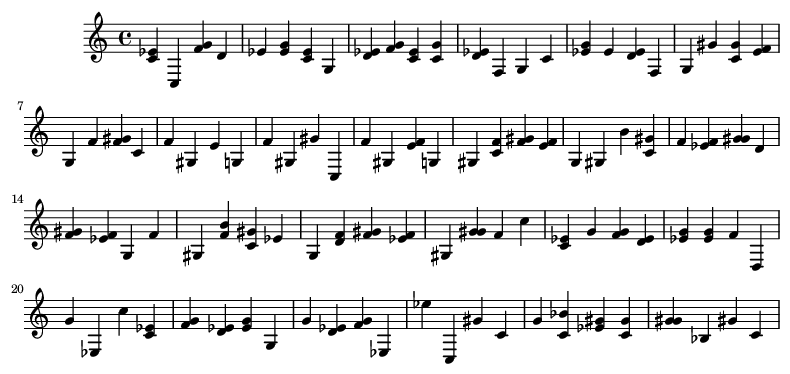

 The total count of unique notes in the Corpus: 453


In [15]:
# Example: Create a Melody from a snippet of the Corpus
Melody_Snippet = chords_n_notes(Corpus[:100])

# Show the music sheet and play the music
show_and_play(Melody_Snippet)

count_num = Counter(Corpus)
print("\033[96m The total count of unique notes in the Corpus:\033[0m", len(count_num))

NameError: name 'Corpus' is not defined

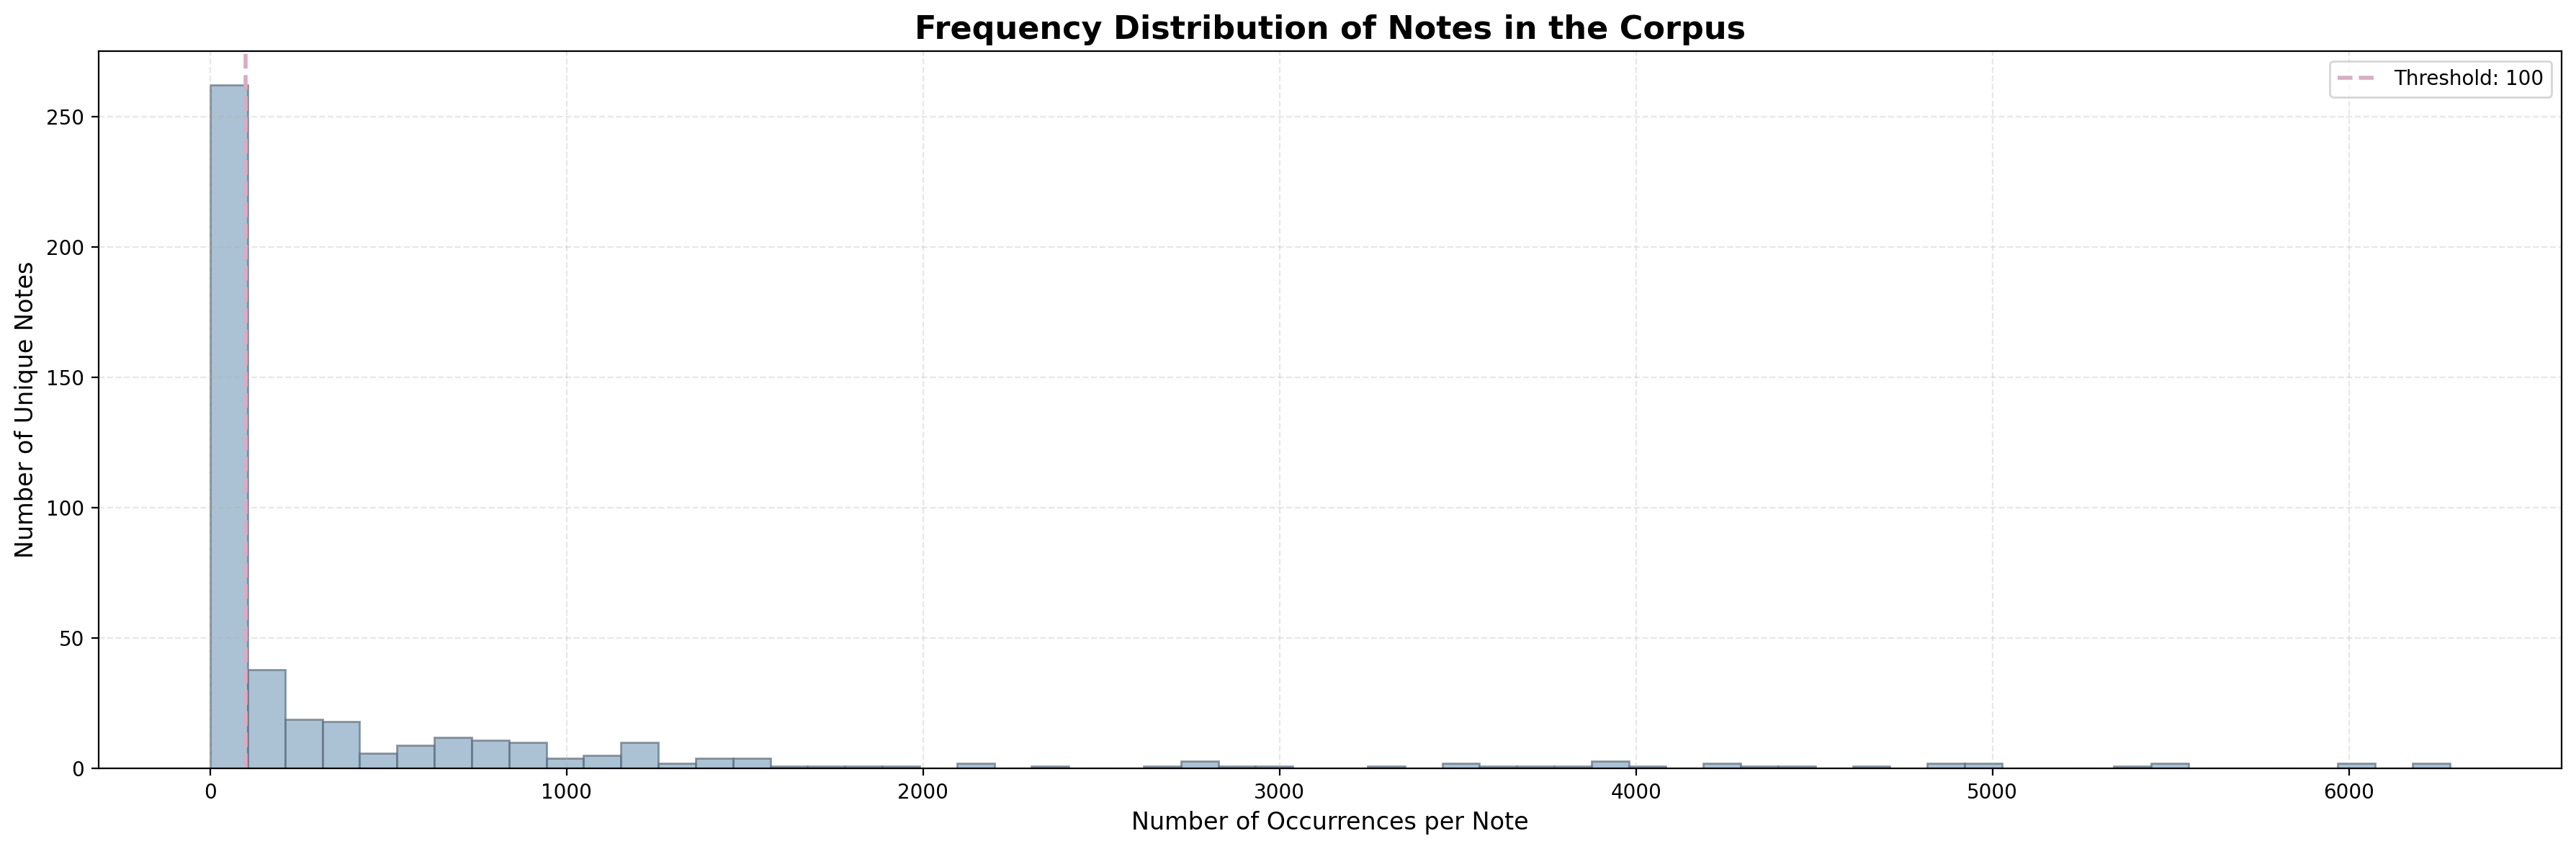

In [16]:
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
# Plotting the distribution of Notes with enhanced aesthetics
plt.figure(figsize=(18, 6))
#bins = np.arange(0, max(Recurrence) + 20, 80)
plt.hist(Recurrence, bins=60, color="#86A9C1", edgecolor="#5D6F82", alpha=0.7)
plt.axvline(x=100, color="#DBACC1", linestyle='--', linewidth=2, label='Threshold: 100')
plt.title("Frequency Distribution of Notes in the Corpus", fontsize=16, weight='bold')
plt.xlabel("Number of Occurrences per Note", fontsize=12)
plt.ylabel("Number of Unique Notes", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

sequence_length = 100

# Unikatne note i akordi
pitchnames = sorted(set(Corpus))
n_vocab = len(pitchnames)

# Mapiranje nota u brojeve
note_to_int = {Corpus: num for num, Corpus in enumerate(pitchnames)}

# Kreiranje input-output parova
network_input = []
network_output = []

for i in range(len(Corpus) - sequence_length):
    seq_in = Corpus[i: i + sequence_length]
    seq_out = Corpus[i + sequence_length]

    network_input.append([note_to_int[n] for n in seq_in])
    network_output.append(note_to_int[seq_out])

In [ ]:
# PRETPROCESIRANJE PODATAKA I PRIPREMA ZA MREŽU
n_patterns = len(network_input)
print(f"Kreirano {n_patterns} input-output sekvenci.")

# Uvoz biblioteke za prevođenje numeričkih atributa
from tensorflow.keras.utils import to_categorical
import numpy as np

# reshape input za LSTM: (samples, time steps, features)
network_input = np.reshape(network_input, (len(network_input), sequence_length, 1))

# normalizacija ulaznih vrednosti u opseg [0, 1]
network_input = network_input / float(n_vocab)
# konvertovanje izlaznih vrednosti u one-hot kodiranje, da bi mreži bilo lakše
network_output = to_categorical(network_output, num_classes=n_vocab)

print("Input shape:", network_input.shape)
print("Output shape:", network_output.shape)


Kreirano 240895 input-output sekvenci.


In [40]:
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)

print("\033[96m The total count of notes that appear fewer than 100 times:\033[0m", len(rare_note))

for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("\033[96m The length of the Corpus after removing the rare notes:\033[0m", len(Corpus))

 The total count of notes that appear fewer than 100 times: 260
 The length of the Corpus after removing the rare notes: 237516


In [17]:
from collections import Counter

# Brojanje nota i filtriranje
count_num = Counter(Corpus)

rare_note = [note for note, count in count_num.items() if count < 100]
Corpus = [note for note in Corpus if note not in rare_note]

print("\033[96mThe length of the Corpus after removing the rare notes:\033[0m", len(Corpus))

# Nastavak: Priprema za mrežu
sequence_length = 100
pitchnames = sorted(set(Corpus))
n_vocab = len(pitchnames)

note_to_int = {note: num for num, note in enumerate(pitchnames)}

network_input = []
network_output = []

for i in range(len(Corpus) - sequence_length):
    seq_in = Corpus[i: i + sequence_length]
    seq_out = Corpus[i + sequence_length]

    network_input.append([note_to_int[n] for n in seq_in])
    network_output.append(note_to_int[seq_out])

# Preprocesiranje
n_patterns = len(network_input)
print(f"Kreirano {n_patterns} input-output sekvenci.")

from tensorflow.keras.utils import to_categorical
import numpy as np

network_input = np.reshape(network_input, (len(network_input), sequence_length, 1))
network_input = network_input / float(n_vocab)
network_output = to_categorical(network_output, num_classes=n_vocab)

print("Input shape:", network_input.shape)
print("Output shape:", network_output.shape)


The length of the Corpus after removing the rare notes: 237105
Kreirano 237005 input-output sekvenci.
Input shape: (237005, 100, 1)
Output shape: (237005, 193)


In [ ]:
"""sym = sorted(list(set(Corpus)))
corp = len(Corpus) #length of corpus
symb = len(sym) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(sym))
reverse_mapping = dict((i, c) for i, c in enumerate(sym))

print("\033[96mTotal number of characters:\033[0m", corp)
print("\033[96mTotal number of unique characters:\033[0m", sym)"""

In [ ]:
'''# Korišćenje LSTM slojeva, dodavanje dropout-a kako ne bi dolazilo do overfitting-a (tehnika regulacije), izlazni sloj je gusti (potpuno povezan, aktivaciona funkcija softmax)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation

model = Sequential()

# Prvi LSTM sloj, ima 512 neurona
model.add(LSTM(512, input_shape = (network_input.shape[1], network_input.shape[2]), return_sequences = True))
model.add(Dropout(0.3))

# Drugi LSTM sloj, takođe ima 512
model.add(LSTM(512, return_sequences = True))
model.add(Dropout(0.3))

# Treći LSTM sloj, mreža se smatra dubokom, ako ima preko 2 sloja
model.add(LSTM(512))
model.add(Dropout(0.3))

# Izlazni sloj
model.add(Dense(n_vocab))
model.add(Activation('softmax'))

# Kompajliranje modela, koristi se kategorička krosentropija i Adam kao najpoznatiji optimizator
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

model.summary()'''

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    network_input, network_output, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# --- 4. Kreiranje modela ---
mmodel = Sequential()

model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(sequence_length, 1)))
model.add(Dropout(0.3))

model.add(LSTM(128))
model.add(Dropout(0.3))

model.add(Dense(n_vocab, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Training samples: 189604, Test samples: 47401


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 100, 1024)      │     2,105,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 1024)      │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 1024)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 256)       │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 193)            │        49,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,465 (14.12 MB)

 Trainable params: 3,699,649 (14.11 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/50
  10/2963 ━━━━━━━━━━━━━━━━━━━━ 9:45:46 12s/step - accuracy: 0.0046 - loss: 5.6388

In [ ]:

model.summary()

from tensorflow.keras.callbacks import ModelCheckpoint

# Čuvaju se SAMO težine (ne ceo model)
filepath = "weights-improvement-{epoch:02d}-{loss:.4f}.weights.h5"

checkpoint = ModelCheckpoint(
    filepath,
    monitor = 'loss',
    verbose = 1,
    save_best_only = True, # najbolje težine
    save_weights_only = True,  # ključno
    mode = 'min'
)

callbacks_list = [checkpoint]

# Treniranje modela, podešavanje hiperparametara
model.fit(
    network_input,
    network_output,
    epochs = 50,
    batch_size = 64,
    callbacks = callbacks_list
)

import numpy as np

# Bira se nasumični seed za generisanje
start = np.random.randint(0, len(network_input) - 1)
pattern = network_input[start]
pattern = pattern.tolist()

# Broj nota koje želiš da generišeš
generated_notes = []

for note_index in range(500):  # npr. 500 nota
    prediction_input = np.reshape(pattern, (1, len(pattern), 1))
    prediction_input = prediction_input / float(n_vocab)

    prediction = model.predict(prediction_input, verbose = 0)
    index = np.argmax(prediction)
    result = pitchnames[index]
    generated_notes.append(result)

    pattern.append([index / float(n_vocab)])
    pattern = pattern[1:]

from music21 import instrument, note, chord, stream
output_notes = []
# Reverzni proces, sada se vraća ono što je primećeno
for pattern in generated_notes:
    # Ako je akord
    if ('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        chord_notes = [note.Note(int(n)) for n in notes_in_chord]
        for n in chord_notes:
            n.storedInstrument = instrument.Piano()
        new_chord = chord.Chord(chord_notes)
        output_notes.append(new_chord)
    else:
        new_note = note.Note(pattern)
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)

# Kreiraj MIDI ,,tok“
midi_stream = stream.Stream(output_notes)

# Sačuvaj u datoteku
midi_stream.write('midi', fp ='generated_music.mid')

from IPython.display import Audio
import subprocess

# Konvertuj MIDI datoteku u audio datoteku – da bi zvuk mogao da se pusti unutar Jupyter sveske
!apt install -y timidity
!timidity generated_music.mid -Ow -o - | ffmpeg -i - -f mp3 -acodec libmp3lame -ab 192k generated_music.mp3
Audio("generated_music.mp3")
